# <b><span style='color:#F1A424'>AutoML - Regression - Medical Insurance Charges Prediction</span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset Used : Medical insurance Dataset**

**Features**:

- `Age`: The insured person's age.
- `Sex`: Gender (male or female) of the insured.
- `BMI (Body Mass Index)`: A measure of body fat based on height and weight.
- `Children`: The number of dependents covered.
- `Smoker`: Whether the insured is a smoker (yes or no).
- `Region`: The geographic area of coverage.

**Target Variable**:

- `Charges`: The medical insurance costs incurred by the insured person.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict medical insurance costs incurred by the insured person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [ ]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','insurance')

In [5]:
# Fetching in teradata dataframe
insurance_df = DataFrame("insurance")

In [6]:
# first 5 rows
insurance_df.head()

age,sex,bmi,children,smoker,region,charges
18,male,30.4,3,no,northeast,3481.868
18,female,24.09,1,no,southeast,2201.0971
18,female,40.26,0,no,southeast,1634.5734
18,female,42.24,0,yes,southeast,38792.6856
18,male,27.36,1,yes,northeast,17178.6824
18,female,26.73,0,no,southeast,1615.7667
18,female,31.35,0,no,southeast,1622.1885
18,male,23.75,0,no,northeast,1705.6245
18,male,22.99,0,no,northeast,1704.5681
18,male,30.14,0,no,southeast,1131.5066


In [7]:
# insurance_df dataset
insurance_df.shape

(1338, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
insurance_df_sample = insurance_df.sample(frac = [0.8, 0.2])

In [9]:
insurance_df_sample.head()

age,sex,bmi,children,smoker,region,charges,sampleid
18,male,43.01,0,no,southeast,1149.3959,1
18,female,31.13,0,no,southeast,1621.8827,1
18,female,42.24,0,yes,southeast,38792.6856,1
18,male,34.1,0,no,southeast,1137.011,1
18,male,28.31,1,no,northeast,11272.33139,1
18,male,53.13,0,no,southeast,1163.4627,1
18,male,38.17,0,yes,southeast,36307.7983,1
18,male,33.33,0,no,southeast,1135.9407,1
18,male,25.175,0,yes,northeast,15518.18025,2
18,female,30.115,0,no,northeast,21344.8467,1


In [10]:
# Fetching train and test data
insurance_df_train= insurance_df_sample[insurance_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
insurance_df_test = insurance_df_sample[insurance_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
insurance_df_train.shape

(1070, 7)

In [12]:
# test data shape
insurance_df_test.shape

(268, 7)

In [13]:
#train dataset
insurance_df_train.head()

age,sex,bmi,children,smoker,region,charges
18,female,28.215,0,no,northeast,2200.83085
18,male,21.78,2,no,southeast,11884.04858
18,female,31.35,0,no,southeast,1622.1885
18,male,23.75,0,no,northeast,1705.6245
18,male,22.99,0,no,northeast,1704.5681
18,male,38.17,0,yes,southeast,36307.7983
18,male,39.14,0,no,northeast,12890.05765
18,female,26.73,0,no,southeast,1615.7667
18,female,21.66,0,yes,northeast,14283.4594
18,female,20.79,0,no,southeast,1607.5101


In [14]:
# test dataset
insurance_df_test.head()

age,sex,bmi,children,smoker,region,charges
18,male,28.5,0,no,northeast,1712.227
18,male,26.18,2,no,southeast,2304.0022
18,female,33.88,0,no,southeast,11482.63485
18,female,31.92,0,no,northeast,2205.9808
18,male,25.175,0,yes,northeast,15518.18025
18,male,33.66,0,no,southeast,1136.3994
18,female,26.315,0,no,northeast,2198.18985
18,female,37.29,1,no,southeast,2219.4451
18,female,38.17,0,no,southeast,1631.6683
18,female,36.85,0,no,southeast,1629.8335


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 100 sec
# and verbose level 2 for detailed loggging

aml = AutoRegressor(max_runtime_secs=100,
                    verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 1070
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
region,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
age,INTEGER,1070,0,None,0,1070,0,0.0,100.0
children,INTEGER,1070,0,None,466,604,0,0.0,100.0
smoker,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
charges,FLOAT,1070,0,None,0,1070,0,0.0,100.0
bmi,FLOAT,1070,0,None,0,1070,0,0.0,100.0
sex,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,age,bmi,children,charges
min,18,15.96,0,1121.874
std,14.016,6.126,1.2,11943.088
25%,26,26.04,0,4577.664
50%,39,30.21,1,9178.153
75%,51,34.43,2,15820.021
max,64,53.13,5,63770.428
mean,39.068,30.509,1.073,13023.815
count,1070,1070,1070,1070



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
sex                       2         
smoker                    2         
region                    4         

No Futile columns found.

Target Column Distribution:


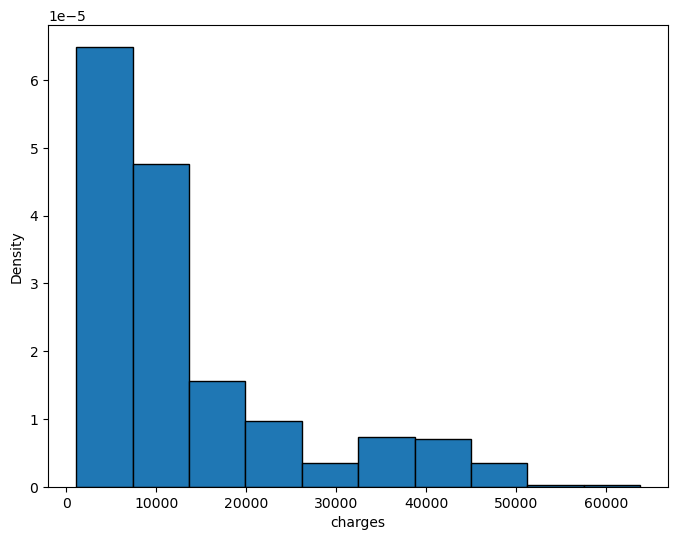

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges          11.401869
1        bmi           0.747664


Analysis completed. No action taken.                                                    


Analysis indicates all categorical columns are significant. No action Needed.           


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260227213863"' - 5/19


['sex', 'smoker', 'region']


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
61,0,1,35.86,0,0,1,0,0,1,0,46599.1084,22
61,1,0,33.33,4,1,0,0,0,1,0,36580.28216,142
61,0,1,28.31,1,0,1,0,1,0,0,28868.6639,62
61,1,0,31.16,0,1,0,0,1,0,0,13429.0354,94
61,1,0,28.2,0,1,0,0,0,0,1,13041.921,14
61,1,0,29.07,0,0,1,0,1,0,0,29141.3603,38
61,1,0,39.1,2,1,0,0,0,0,1,14235.072,86
61,1,0,22.04,0,1,0,1,0,0,0,13616.3586,46
61,0,1,43.4,0,1,0,0,0,0,1,12574.049,70
61,0,1,33.915,0,1,0,1,0,0,0,13143.86485,158


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
34,0,1,34.21,0,1,0,0,0,1,0,3935.1799,9
61,1,0,28.2,0,1,0,0,0,0,1,13041.921,14
61,0,1,35.86,0,0,1,0,0,1,0,46599.1084,22
49,1,0,31.9,5,1,0,0,0,0,1,11552.904,13
38,0,1,29.26,2,1,0,0,1,0,0,6457.8434,12
38,0,1,28.025,1,1,0,1,0,0,0,6067.12675,20
32,1,0,17.765,2,0,1,0,1,0,0,32734.1863,15
32,1,0,37.145,3,1,0,1,0,0,0,6334.34355,23
40,0,1,24.97,2,1,0,0,0,1,0,6593.5083,10
40,0,1,32.775,1,0,1,1,0,0,0,39125.33225,18


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
26,0,1,23.7,2,1,0,0,0,0,1,3484.331,24
38,1,0,19.95,2,1,0,1,0,0,0,7133.9025,28
38,0,1,27.835,2,1,0,0,1,0,0,6455.86265,124
49,0,1,25.84,1,1,0,1,0,0,0,9282.4806,29
19,0,1,35.4,0,1,0,0,0,0,1,1263.249,27
19,0,1,25.555,0,1,0,0,1,0,0,1632.56445,123
61,0,1,32.3,2,1,0,0,1,0,0,14119.62,30
61,0,1,33.535,0,1,0,1,0,0,0,13143.33665,126
32,0,1,46.53,2,1,0,0,0,1,0,4686.3887,31
32,1,0,28.93,0,1,0,0,0,1,0,3972.9247,127


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges          11.401869
1        bmi           0.747664


['bmi']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259678705753"' - 7/19


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
19,0,1,21.755,0,1,0,0,1,0,0,1627.28245,283
19,1,0,28.9,0,1,0,0,0,0,1,1743.214,163
19,1,0,29.8,0,1,0,0,0,0,1,1744.465,379
19,0,1,34.4,0,1,0,0,0,0,1,1261.859,51
19,1,0,28.88,0,0,1,0,1,0,0,17748.5062,275
19,0,1,35.53,0,1,0,0,1,0,0,1646.4297,259
19,0,1,25.175,0,1,0,0,1,0,0,1632.03625,59
19,0,1,27.265,2,1,0,0,1,0,0,22493.65964,131
19,0,1,20.9,1,1,0,0,0,0,1,1832.094,91
19,1,0,31.825,1,1,0,0,1,0,0,2719.27975,107


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264224327690"' - 8/19
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260212268119"'


['smoker_0', 'region_0', 'children', 'age', 'smoker_1', 'bmi']


['children', 'age', 'bmi']


smoker_0,id,region_0,charges,smoker_1,children,age,bmi
1,10,0,6593.5083,0,0.8047892010664878,0.06973726793330046,-0.9143905112779115
1,12,0,6457.8434,0,0.8047892010664878,-0.07327894296739813,-0.17535102884464382
1,13,0,11552.904,0,3.3261977324866168,0.7133102169864441,0.27944249880659705
1,14,0,13041.921,0,-0.8761498198802651,1.5714074823906357,-0.35795752100764267
1,16,0,2904.088,0,-0.03568030940688866,-0.9313762083715896,-0.047871024881796134
0,17,0,18972.495,1,0.8047892010664878,-0.3593113647687953,-0.857541320321506
0,15,0,32734.1863,1,0.8047892010664878,-0.5023275756694939,-2.155597847159424
0,11,0,13844.506,1,-0.8761498198802651,-1.4319329465240347,-1.477714312573199
1,9,0,3935.1799,0,-0.8761498198802651,-0.3593113647687953,0.6773868355014336
1,8,1,2897.3235,0,-0.8761498198802651,-0.9313762083715896,-0.14261967647580487


smoker_0,id,region_0,charges,smoker_1,children,age,bmi
1,243,0,1628.4709,0,-0.8761498198802651,-1.4319329465240347,-1.3209483617540212
0,571,0,46661.4424,1,1.645258711539864,0.9993426387878412,1.1339030659089295
1,483,0,21797.0004,0,-0.8761498198802651,1.428391271489937,1.2269290147466831
1,819,0,5693.4305,0,1.645258711539864,-0.6453437865701924,-1.7791872949177718
1,1083,0,9620.3307,0,1.645258711539864,0.5702940060857455,-0.07715697173812637
1,555,0,14001.1338,0,1.645258711539864,1.428391271489937,-0.4406472533078684
0,539,1,30184.9367,1,1.645258711539864,1.428391271489937,-0.07715697173812637
1,451,0,12244.531,0,-0.8761498198802651,1.428391271489937,0.8479344083706495
1,211,0,1728.897,0,-0.8761498198802651,-1.4319329465240347,-2.0117521670121565
1,123,0,1632.5645,0,-0.8761498198802651,-1.4319329465240347,-0.8136124000370113


['region_1', 'sex_0', 'smoker_0', 'region_3', 'region_2', 'region_0', 'children', 'sex_1', 'age', 'smoker_1', 'bmi']


['r_children', 'r_age', 'r_bmi']


r_region_1,r_smoker_0,r_smoker_1,r_sex_0,r_region_2,id,charges,r_region_3,r_sex_1,r_region_0,r_children,r_age,r_bmi
0,1,0,0,1,10,6593.5083,0,1,0,0.8047892010664878,0.06973726793330046,-0.9143905112779115
1,1,0,0,0,12,6457.8434,0,1,0,0.8047892010664878,-0.07327894296739813,-0.17535102884464382
0,1,0,1,0,13,11552.904,1,0,0,3.3261977324866168,0.7133102169864441,0.27944249880659705
0,1,0,1,0,14,13041.921,1,0,0,-0.8761498198802651,1.5714074823906357,-0.35795752100764267
0,1,0,0,0,16,2904.088,1,1,0,-0.03568030940688866,-0.9313762083715896,-0.047871024881796134
0,0,1,0,1,17,18972.495,0,1,0,0.8047892010664878,-0.3593113647687953,-0.857541320321506
1,0,1,1,0,15,32734.1863,0,0,0,0.8047892010664878,-0.5023275756694939,-2.155597847159424
0,0,1,1,0,11,13844.506,1,0,0,-0.8761498198802651,-1.4319329465240347,-1.477714312573199
0,1,0,0,1,9,3935.1799,0,1,0,-0.8761498198802651,-0.3593113647687953,0.6773868355014336
0,1,0,0,0,8,2897.3235,0,1,1,-0.8761498198802651,-0.9313762083715896,-0.14261967647580487


r_region_1,r_smoker_0,r_smoker_1,r_sex_0,r_region_2,id,charges,r_region_3,r_sex_1,r_region_0,r_children,r_age,r_bmi
1,1,0,0,0,243,1628.4709,0,1,0,-0.8761498198802651,-1.4319329465240347,-1.3209483617540212
1,0,1,1,0,571,46661.4424,0,0,0,1.645258711539864,0.9993426387878412,1.1339030659089295
0,1,0,0,0,483,21797.0004,1,1,0,-0.8761498198802651,1.428391271489937,1.2269290147466831
1,1,0,1,0,819,5693.4305,0,0,0,1.645258711539864,-0.6453437865701924,-1.7791872949177718
1,1,0,0,0,1083,9620.3307,0,1,0,1.645258711539864,0.5702940060857455,-0.07715697173812637
0,1,0,1,1,555,14001.1338,0,0,0,1.645258711539864,1.428391271489937,-0.4406472533078684
0,0,1,0,0,539,30184.9367,0,1,1,1.645258711539864,1.428391271489937,-0.07715697173812637
0,1,0,1,1,451,12244.531,0,0,0,-0.8761498198802651,1.428391271489937,0.8479344083706495
0,1,0,1,0,211,1728.897,1,0,0,-0.8761498198802651,-1.4319329465240347,-2.0117521670121565
1,1,0,0,0,123,1632.5645,0,1,0,-0.8761498198802651,-1.4319329465240347,-0.8136124000370113


['age', 'bmi', 'children']


region_1,sex_0,smoker_0,region_3,region_2,id,region_0,charges,sex_1,smoker_1,age,bmi,children
1,0,1,0,0,152,0,3292.52985,1,0,-0.93137620837159,0.6265671041919199,-0.03568030940688884
0,0,0,0,0,18,1,39125.33225,1,1,0.06973726793330048,0.4301789899788836,-0.03568030940688884
0,0,1,0,1,50,0,5415.6612,1,0,0.06973726793330048,-0.8954407809591102,-0.8761498198802695
0,1,1,1,0,61,0,26140.3603,0,0,0.7133102169864444,-0.5474548241956597,-0.03568030940688884
0,1,1,0,0,103,1,5148.5526,0,0,-0.502327575669494,0.21742519958142792,-0.03568030940688884
1,0,1,0,0,47,0,3866.8552,1,0,-0.502327575669494,-0.24081373358232303,-0.8761498198802695
1,1,1,0,0,107,0,2719.27975,0,0,-1.4319329465240354,0.26652222813468696,-0.03568030940688884
0,0,1,1,0,91,0,1832.094,1,0,-1.4319329465240354,-1.6155305330735759,-0.03568030940688884
0,1,1,0,0,46,1,13616.3586,0,0,1.571407482390636,-1.4191424188605397,-0.8761498198802695
1,1,1,0,0,94,0,13429.0354,0,0,1.571407482390636,0.15196249484374938,-0.8761498198802695


region_1,sex_0,smoker_0,region_3,region_2,id,region_0,charges,sex_1,smoker_1,age,bmi,children
0,0,0,1,0,25,0,35491.64,1,1,-0.35931136476879544,0.08994519561858019,-0.8761498198802695
0,0,1,1,0,24,0,3484.331,1,0,-0.93137620837159,-1.133173761322259,0.8047892010664918
0,1,0,0,0,120,1,14455.64405,0,1,-0.93137620837159,-2.253791904265943,0.8047892010664918
0,0,1,0,1,31,0,4686.3887,1,0,-0.502327575669494,2.7997566312072277,0.8047892010664918
1,0,1,0,0,30,0,14119.62,1,0,1.571407482390636,0.348350609056785,0.8047892010664918
0,0,1,0,0,126,1,13143.33665,1,0,1.571407482390636,0.5611043994542406,-0.8761498198802695
0,1,1,0,0,28,1,7133.9025,0,0,-0.07327894296739816,-1.7791872949177725,0.8047892010664918
1,0,1,0,0,124,0,6455.86265,1,0,-0.07327894296739816,-0.4208361716109391,0.8047892010664918
0,0,1,0,0,29,1,9282.4806,1,0,0.7133102169864444,-0.7645153714837525,-0.03568030940688884
1,1,1,0,0,125,0,10156.7832,0,0,0.7133102169864444,-1.2227543046475033,0.8047892010664918


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7']


response_column : charges                                                                                                                             
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
seed : 42
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : charges
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
seed : 42
Total number of models for xgboost : 2592
-----------------------------------------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260588977982"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719263435027477"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260931641183"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266685033703"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260303899654"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265166294253"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260890948120"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260468163946"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261448303525"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260198495277"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719265691010101"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261328806216"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260059566100"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260435049904"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719260326898205"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,DECISIONFOREST_1,rfe,1912.647829,1.666496e+07,0.147665,4082.273453,0.384272,0.866146,0.858857
1,2,XGBOOST_0,lasso,2387.573133,1.773061e+07,0.160489,4210.772852,0.400611,0.857587,0.853459
2,3,XGBOOST_3,lasso,2387.573133,1.773061e+07,0.160489,4210.772852,0.400611,0.857587,0.853459
3,4,DECISIONFOREST_0,lasso,2008.010938,1.909442e+07,0.158779,4369.715766,0.398471,0.846633,0.842188
4,5,XGBOOST_1,rfe,2453.141629,1.929195e+07,0.158326,4392.259819,0.397902,0.845046,0.836608
5,6,DECISIONFOREST_3,lasso,2768.122467,2.017074e+07,0.197690,4491.185242,0.444623,0.837988,0.833292
6,7,KNN_9,lasso,2526.667603,2.105253e+07,0.221492,4588.304047,0.470630,0.830905,0.826004
7,8,KNN_0,lasso,2570.316537,2.358725e+07,0.230109,4856.670663,0.479697,0.810546,0.805055
8,9,XGBOOST_2,pca,2682.154242,2.456204e+07,0.227037,4956.010813,0.476484,0.802717,0.795018
9,10,KNN_4,rfe,2995.051716,2.834865e+07,0.232425,5324.345325,0.482105,0.772303,0.759903


In [16]:
# Fitting train data
aml.fit(insurance_df_train, insurance_df_train.charges)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,DECISIONFOREST_1,rfe,1912.647829,1.666496e+07,0.147665,4082.273453,0.384272,0.866146,0.858857
1,2,XGBOOST_0,lasso,2387.573133,1.773061e+07,0.160489,4210.772852,0.400611,0.857587,0.853459
2,3,XGBOOST_3,lasso,2387.573133,1.773061e+07,0.160489,4210.772852,0.400611,0.857587,0.853459
3,4,DECISIONFOREST_0,lasso,2008.010938,1.909442e+07,0.158779,4369.715766,0.398471,0.846633,0.842188
4,5,XGBOOST_1,rfe,2453.141629,1.929195e+07,0.158326,4392.259819,0.397902,0.845046,0.836608
5,6,DECISIONFOREST_3,lasso,2768.122467,2.017074e+07,0.197690,4491.185242,0.444623,0.837988,0.833292
6,7,KNN_9,lasso,2526.667603,2.105253e+07,0.221492,4588.304047,0.470630,0.830905,0.826004
7,8,KNN_0,lasso,2570.316537,2.358725e+07,0.230109,4856.670663,0.479697,0.810546,0.805055
8,9,XGBOOST_2,pca,2682.154242,2.456204e+07,0.227037,4956.010813,0.476484,0.802717,0.795018
9,10,KNN_4,rfe,2995.051716,2.834865e+07,0.232425,5324.345325,0.482105,0.772303,0.759903


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,DECISIONFOREST_1,rfe,1912.647829,1.666496e+07,0.147665,4082.273453,0.384272,0.866146,0.858857


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [21]:
# Generating prediction and metrics on test data
prediction = aml.predict(insurance_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719264194716380"'⫾⫾⫾｜ 50% - 5/10


age,sex_0,sex_1,bmi,children,smoker_0,smoker_1,region_0,region_1,region_2,region_3,charges,id
26,1,0,42.4,1,1,0,0,0,0,1,3410.324,56
26,0,1,32.49,1,1,0,1,0,0,0,3490.5491,16
26,0,1,35.42,0,1,0,0,0,1,0,2322.6218,48
26,0,1,31.065,0,1,0,0,1,0,0,2699.56835,32
43,1,0,29.9,1,1,0,0,0,0,1,7337.748,104
43,1,0,46.2,0,0,1,0,0,1,0,45863.205,96
26,0,1,29.15,1,1,0,0,0,1,0,2902.9065,24
26,0,1,27.265,3,1,0,1,0,0,0,4661.28635,40
26,1,0,40.185,0,1,0,0,1,0,0,3201.24515,8
26,1,0,28.785,0,1,0,1,0,0,0,3385.39915,64


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719261958947730"'⫾⫾⫾｜ 60% - 6/10


id,smoker_0,region_0,children,age,smoker_1,bmi,charges
52,1,0,2,55,0,32.775,12268.6323
132,1,0,2,46,0,40.375,8733.2293
8,1,0,0,26,0,40.185,3201.2452
32,1,0,0,26,0,31.065,2699.5684
152,1,0,0,20,0,29.735,1769.5316
128,0,0,3,20,1,35.625,37465.3438
9,1,0,1,34,0,26.73,5002.7827
33,1,0,1,34,0,27.5,5003.853
57,0,0,2,64,1,31.3,47291.055
81,1,0,3,64,0,39.05,16085.1275


smoker_0,id,region_0,charges,smoker_1,children,age,bmi
1,52,0,12268.6323,0,0.8047892010664878,1.14235884968854,0.4301789899788835
1,132,0,8733.2293,0,0.8047892010664878,0.4987859006353962,1.7394330847324573
1,8,0,3201.2452,0,-0.8761498198802651,-0.9313762083715896,1.7067017323636184
1,32,0,2699.5684,0,-0.8761498198802651,-0.9313762083715896,0.13559681865932988
1,152,0,1769.5316,0,-0.8761498198802651,-1.3604248410736854,-0.09352264792254585
0,128,0,37465.3438,1,1.645258711539864,-1.3604248410736854,0.9211492755114739
1,9,0,5002.7827,0,-0.03568030940688866,-0.3593113647687953,-0.6111948261770836
1,33,0,5003.853,0,-0.03568030940688866,-0.3593113647687953,-0.47854671394547166
0,57,0,47291.055,1,0.8047892010664878,1.7859317987416834,0.17608033343131527
1,81,0,16085.1275,0,1.645258711539864,1.7859317987416834,1.511174969528709


id,region_1,sex_0,smoker_0,region_3,region_2,region_0,children,sex_1,age,smoker_1,bmi,charges
52,1,1,1,0,0,0,2,0,55,0,32.775,12268.6323
132,1,0,1,0,0,0,2,1,46,0,40.375,8733.2293
8,1,1,1,0,0,0,0,0,26,0,40.185,3201.2452
32,1,0,1,0,0,0,0,1,26,0,31.065,2699.5684
152,1,0,1,0,0,0,0,1,20,0,29.735,1769.5316
128,1,0,0,0,0,0,3,1,20,1,35.625,37465.3438
9,0,1,1,0,1,0,1,0,34,0,26.73,5002.7827
33,0,1,1,1,0,0,1,0,34,0,27.5,5003.853
57,0,1,0,1,0,0,2,0,64,1,31.3,47291.055
81,0,1,1,0,1,0,3,0,64,0,39.05,16085.1275


r_region_1,r_smoker_0,r_smoker_1,r_sex_0,r_region_2,id,charges,r_region_3,r_sex_1,r_region_0,r_children,r_age,r_bmi
0,0,1,1,0,57,47291.055,1,0,0,0.8047892010664878,1.7859317987416834,0.17608033343131527
0,0,1,1,0,105,37079.372,1,0,0,-0.8761498198802651,-0.4308194702191446,0.5550749398073497
0,1,0,0,1,97,11326.7149,0,1,0,-0.03568030940688866,-0.4308194702191446,2.098616609411563
0,0,1,1,0,129,16776.304,0,0,1,0.8047892010664878,-0.4308194702191446,-1.926478380577549
0,1,0,0,0,30,13129.6035,0,1,1,-0.8761498198802651,1.5714074823906357,-1.1409259237254046
0,0,1,0,0,62,20773.6277,0,1,1,-0.03568030940688866,-0.21629515386809672,-0.38810481924210005
1,1,0,0,0,65,30166.6182,0,1,0,-0.03568030940688866,1.7859317987416834,-0.9609034856967884
1,1,0,1,0,113,6360.9936,0,0,0,1.645258711539864,-0.4308194702191446,2.181306341711788
1,1,0,1,0,52,12268.6323,0,0,0,0.8047892010664878,1.14235884968854,0.4301789899788835
1,1,0,1,0,84,4922.9159,0,0,0,0.8047892010664878,-0.7168518920205418,0.31561925668794594


region_1,sex_0,smoker_0,region_3,region_2,id,region_0,charges,sex_1,smoker_1,age,bmi,children
1,1,1,0,0,52,0,12268.6323,0,0,1.1423588496885402,0.4301789899788836,0.8047892010664918
1,0,1,0,0,132,0,8733.2293,1,0,0.4987859006353964,1.739433084732458,0.8047892010664918
1,1,1,0,0,8,0,3201.2452,0,0,-0.93137620837159,1.7067017323636189,-0.8761498198802695
1,0,1,0,0,32,0,2699.5684,1,0,-0.93137620837159,0.1355968186593299,-0.8761498198802695
1,0,1,0,0,152,0,1769.5316,1,0,-1.3604248410736859,-0.09352264792254587,-0.8761498198802695
1,0,0,0,0,128,0,37465.3438,1,1,-1.3604248410736859,0.9211492755114741,1.6452587115398725
0,1,1,0,1,9,0,5002.7827,0,0,-0.35931136476879544,-0.6111948261770839,-0.03568030940688884
0,1,1,1,0,33,0,5003.853,0,0,-0.35931136476879544,-0.4785467139454718,-0.03568030940688884
0,1,0,1,0,57,0,47291.055,0,1,1.785931798741684,0.17608033343131532,0.8047892010664918
0,1,1,0,1,81,0,16085.1275,0,0,1.785931798741684,1.5111749695287093,1.6452587115398725


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,charges
0,65,-0.556967,0.473040,1.918005,0.631997,-0.508665,-0.586658,-0.162805,0.473621,30166.6182
1,9,0.582306,0.182273,0.013030,-0.749760,0.035461,-0.432751,0.756402,-0.325752,5002.7827
2,113,-1.660304,0.503450,-2.083386,-0.763721,-0.310069,-0.195032,-0.515635,0.817551,6360.9936
3,33,0.551693,0.220242,0.042005,-0.771516,-0.149990,0.051918,-0.507813,-0.708335,5003.8530
4,52,-1.313492,0.576880,0.366043,-0.747414,-0.230506,-0.413168,-0.323898,0.640324,12268.6323
5,57,-1.585315,0.646742,0.938311,-0.413272,1.250489,0.055190,-0.756886,-0.526148,47291.0550
6,84,0.023944,0.623974,-0.927038,-0.772185,-0.279107,-0.361403,-0.351031,0.659975,4922.9159
7,81,-2.818315,0.689783,-0.204298,-0.708137,0.065312,-0.282772,0.633092,-0.174976,16085.1275
8,132,-1.709984,-0.038171,-0.879239,0.617460,-0.608412,-0.300602,-0.450268,0.728506,8733.2293
9,105,0.251669,-1.017009,-0.364740,-0.461336,1.144368,0.111314,-0.903332,-0.459151,37079.3720


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : DECISIONFOREST_1 
Feature Selection Method : rfe

Prediction : 
    id    prediction  confidence_lower  confidence_upper     charges
0   52  14472.899660      14472.899660      14472.899660  12268.6323
1  132   8455.131633       8455.131633       8455.131633   8733.2293
2    8   3308.165584       3308.165584       3308.165584   3201.2452
3   32   3308.165584       3308.165584       3308.165584   2699.5684
4  152   1983.795007       1983.795007       1983.795007   1769.5316
5  128  38507.515667      38507.515667      38507.515667  37465.3438
6    9   5362.004482       5362.004482       5362.004482   5002.7827
7   33   5362.004482       5362.004482       5362.004482   5003.8530
8   57  45710.207800      45710.207800      45710.207800  47291.0550
9   81  20421.839210      20421.839210      20421.839210  16085.1275

Performa

In [22]:
# Printing prediction
prediction.head()

id,prediction,confidence_lower,confidence_upper,charges
10,8455.131632894738,8455.131632894738,8455.131632894738,6496.886
12,6860.820846428571,6860.820846428571,6860.820846428571,6652.5288
13,23592.687974999997,23592.687974999997,23592.687974999997,23807.2406
14,13762.843170833332,13762.843170833332,13762.843170833332,13415.0381
16,4844.094585714286,4844.094585714286,4844.094585714286,3490.5491
17,5362.004481578947,5362.004481578947,5362.004481578947,5385.3379
15,3308.165584210526,3308.165584210526,3308.165584210526,4357.0436
11,17885.84312857143,17885.84312857143,17885.84312857143,16297.846
9,5362.004481578947,5362.004481578947,5362.004481578947,5002.7827
8,3308.165584210526,3308.165584210526,3308.165584210526,3201.2452


In [23]:
remove_context()

True